Análisis de información nutricional:

Se analizarán datos nutricionales sobre alimentos con la idea de llegar a un algoritmo que al introducir determinada información nutricional me diga si es apto para determinadas dietas (clusterización). Estaré sumando información a medida que avance el análisis.

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/3m1l10/prueba_2/main/nutrition.csv'
df = pd.read_csv(url)

In [2]:
df.head(5)

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [3]:
df.dtypes

Unnamed: 0       int64
name            object
serving_size    object
calories         int64
total_fat       object
                 ...  
alcohol         object
ash             object
caffeine        object
theobromine     object
water           object
Length: 77, dtype: object

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
df.shape

(8789, 77)

Preparación de datos:

A) Eliminar variables innecesarias detectadas a simple vista:

1- La primera columna 'Unnamed: 0' tiene el código del alimento. No aporta nada a nuestro análisis.

2- 'serving_size' contiene siempre el mismo valor (100g). Tampoco aporta nada por si misma

3- 'lucopene' contiene siempre el mismo valor (0).

4- 'Total_fat' representa casi el mismo valor que 'fat'

5-'saturated_fat' representa casi el mismo valor que 'saturated_fatty_acids'

6- 'tocopherol_alfa" lo tomamos como sinonimo de vitamina E (que ya esta como otro campo, asi que quitamos tocoferol)

7- Eliminar registros que hagan mención a Marcas (ej: Mc donalds)

In [5]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Unnamed: 0','serving_size','lucopene','total_fat','tocopherol_alpha','saturated_fat']

# Eliminar las columnas especificadas
df = df.drop(columns=columnas_a_eliminar)
df.shape

(8789, 71)

B)Convertir datos a numéricos:

Excepto por 'name', todas las variables parecen tener valores numéricos. Sin embargo, la mayoria de las columnas son de tipo texto. Esto sucede porque en esas variables, junto con el valor tambien muestran la unidad y el df.dtypes asume que es de tipo texto. Como luego vamos a implementar un algoritmo que consuma datos numéricos (ej:clusterización), tenemos que pasar esas variables de "texto" a "numerico", y la forma en que lo vamos a hacer es encontrando esos caracteres de unidades (g, mg, mcg, UI) y quitandolos

In [6]:
# Resguardo la columna 'name' en una nueva variable para que al quitar los textos no altere la columna 'name'
columna_resguardada = df.loc[:,'name'].copy()

In [7]:
#Elimino la columna 'name' para avanzar con la eliminación de los caracteres no numéricos
df = df.drop('name', axis=1)

In [8]:
# Elimino caracteres no numéricos de todo el DataFrame. No borrar el separador de decimales '.'
df = df.replace(to_replace='[^0-9.]', value='', regex=True)
df.head(5)

,calories,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,381,0,9.00,0.4,0.00,0.00,0.000,0.000,0.000,0.000,...,0.05,0.009,0.016,0.025,0.00,0.0,0.09,0.00,0.00,8.32
1,691,0,0.00,40.5,22.00,0.00,1.167,0.863,0.130,0.660,...,71.97,6.180,40.801,21.614,0.00,0.0,1.49,0.00,0.00,3.52
2,25,0,2.00,6.9,22.00,0.00,0.649,0.281,0.037,0.039,...,0.18,0.034,0.016,0.076,0.00,0.0,0.66,0.00,0.00,92.30
3,367,0,12.00,13.1,0,0,3.363,0.942,0.270,0.390,...,2.38,0.449,0.589,1.071,0,0,2.37,0,0,8.82
4,144,1,46.00,7.7,4.00,0.00,0.063,0.224,0.097,0.027,...,2.00,1.160,0.530,0.080,1.00,0.0,0.40,0.00,0.00,66.10


In [9]:
# Convierto la columna 'Numeros' a tipo de dato float
df= df.astype(float)
df.head(5)

,calories,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,381.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,691.0,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,25.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,367.0,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,144.0,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


In [10]:
# Inserto la columna resguardada al principio del DataFrame cambiando el nombre a "food_description"
df.insert(0, 'food_description', columna_resguardada)

In [11]:
df.head(5)

,food_description,calories,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,381.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,"Nuts, pecans",691.0,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,"Eggplant, raw",25.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,"Teff, uncooked",367.0,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,"Sherbet, orange",144.0,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


In [12]:
#Veo cómo me quedaron los datos
df.dtypes

food_description     object
calories            float64
cholesterol         float64
sodium              float64
choline             float64
                     ...   
alcohol             float64
ash                 float64
caffeine            float64
theobromine         float64
water               float64
Length: 71, dtype: object

In [13]:
#Agrego las unidades en las descripciones de las columnas. Info perdida al eliminar caracteres no numéricos.
df.columns

Index(['food_description', 'calories', 'cholesterol', 'sodium', 'choline',
       'folate', 'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin',
       'thiamin', 'vitamin_a', 'vitamin_a_rae', 'carotene_alpha',
       'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin',
       'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatty_acids', 'monounsaturated_fatty_acids',
       'polyunsaturated_fatty_acids', 'fatty_a

In [14]:
# Renombro las columnas
nuevos_nombres = {'calories':'calories_100g','cholesterol':'cholesterol_mg','sodium':'sodium_mg','choline':'choline_mg','folate':'folate_mcg','folic_acid':'folic_acid_mcg','niacin':'niacin_mg','pantothenic_acid':'pantothenic_acid_mg','riboflavin':'riboflavin_mg','thiamin':'thiamin_mg','vitamin_a':'vitamin_a_IU','vitamin_a_rae':'vitamin_a_rae_mcg','carotene_alpha':'carotene_alpha_mcg','carotene_beta':'carotene_beta_mcg','cryptoxanthin_beta':'cryptoxanthin_beta_mcg','lutein_zeaxanthin':'lutein_zeaxanthin_mcg','vitamin_b12':'vitamin_b12_mcg','vitamin_b6':'vitamin_b6_mg','vitamin_c':'vitamin_c_mg','vitamin_d':'vitamin_d_IU','vitamin_e':'vitamin_e_mg','vitamin_k':'vitamin_k_mcg','calcium':'calcium_mg','copper':'copper_mg','irom':'irom_mg','magnesium':'magnesium_mg','manganese':'manganese_mg','phosphorous':'phosphorous_mg','potassium':'potassium_mg','selenium':'selenium-(mcg)','zink':'zink_mg','protein':'protein_g','alanine':'alanine_g','arginine':'arginine_g','aspartic_acid':'aspartic_acid_g','cystine':'cystine_g','glutamic_acid':'glutamic_acid_g','glycine':'glycine_g','histidine':'histidine_g','hydroxyproline':'hydroxyproline_g','isoleucine':'isoleucine_g','leucine':'leucine_g','lysine':'lysine_g','methionine':'methionine_g','phenylalanine':'phenylalanine_g','proline':'proline_g','serine':'serine_g','threonine':'threonine_g','tryptophan':'tryptophan_g','tyrosine':'tyrosine_g','valine':'valine_g','carbohydrate':'carbohydrate_g','fiber':'fiber_g','sugars':'sugars_g','fructose':'fructose_g','galactose':'galactose_g','glucose':'glucose_g','lactose':'lactose_g','maltose':'maltose_g','sucrose':'sucrose_g','fat':'fat_g','saturated_fatty_acids':'saturated_fatty_acids_g','monounsaturated_fatty_acids':'monounsaturated_fatty_acids_g','polyunsaturated_fatty_acids':'polyunsaturated_fatty_acids_g','fatty_acids_total_trans':'fatty_acids_total_trans_mg','alcohol':'alcohol_g','ash':'ash_g','caffeine':'caffeine_mg','theobromine':'theobromine_mg','water':'water_g'}
df = df.rename(columns=nuevos_nombres)

In [15]:
df.head(5)

,food_description,calories_100g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,pantothenic_acid_mg,riboflavin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
0,Cornstarch,381.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,"Nuts, pecans",691.0,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,"Eggplant, raw",25.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,"Teff, uncooked",367.0,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,"Sherbet, orange",144.0,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


Por el momento es lo que necesito para trabajar con el data SET. En las visualizaciones veré si preciso seguir eliminando columnas o registros

¿Qué son los nutrientes?

Los nutrientes son sustancias presentes en nuestro organismo y en alimentos, cuya ausencia o disminución por debajo de un limite pueden producir una enfermedad por carencia. Se clasifican en macro y micronutrientes, y la principal diferencia se relaciona con las cantidades que precisa nuestro organismo.

Macronutrientes: Son la mayor fuente de energía y volumen en la alimentacion.

Proteínas (aportan 4kcal por cada gramo) Hidratos de carbono (aportan 4kcal por cada gramo) Grasas (aportan 9kcal por cada gramo)

Micronutrientes: Los precisamos en menos cantidades pero no por eso son irrelevantes.

Vitaminas Minerales

¿Qué papel cumplen las calorías? Representan la energía que se encuentra en los alimentos. El cuerpo tiene una demanda constante de energía y utiliza las calorías de los alimentos para seguir funcionando

Porcentaje de aporte calórico, por cada macronutriente

Teniendo en cuenta las calorías que aporta cada macronutriente por gramo, podemos calcular que porcentaje de energía total aporta cada uno en un determinado alimento.

In [16]:
#Calculo los porcentajes de aporte calórico de cada macronutriente: proteínas, carbohidratos y grasas
Proteina_porcentaje = df['protein_g']*4/ df['calories_100g']
Carbohidratos_porcentaje = df['carbohydrate_g']*4/ df['calories_100g']
Grasas_porcentaje = df['fat_g']*4/ df['calories_100g']

In [17]:
#De esta forma agrego las columnas calculadas al df.
df['Proteina_porcentaje'] = Proteina_porcentaje
df['Carbohidratos_porcentaje'] = Carbohidratos_porcentaje
df['Grasas_porcentaje'] = Grasas_porcentaje

In [18]:
df.columns

Index(['food_description', 'calories_100g', 'cholesterol_mg', 'sodium_mg',
       'choline_mg', 'folate_mcg', 'folic_acid_mcg', 'niacin_mg',
       'pantothenic_acid_mg', 'riboflavin_mg', 'thiamin_mg', 'vitamin_a_IU',
       'vitamin_a_rae_mcg', 'carotene_alpha_mcg', 'carotene_beta_mcg',
       'cryptoxanthin_beta_mcg', 'lutein_zeaxanthin_mcg', 'vitamin_b12_mcg',
       'vitamin_b6_mg', 'vitamin_c_mg', 'vitamin_d_IU', 'vitamin_e_mg',
       'vitamin_k_mcg', 'calcium_mg', 'copper_mg', 'irom_mg', 'magnesium_mg',
       'manganese_mg', 'phosphorous_mg', 'potassium_mg', 'selenium-(mcg)',
       'zink_mg', 'protein_g', 'alanine_g', 'arginine_g', 'aspartic_acid_g',
       'cystine_g', 'glutamic_acid_g', 'glycine_g', 'histidine_g',
       'hydroxyproline_g', 'isoleucine_g', 'leucine_g', 'lysine_g',
       'methionine_g', 'phenylalanine_g', 'proline_g', 'serine_g',
       'threonine_g', 'tryptophan_g', 'tyrosine_g', 'valine_g',
       'carbohydrate_g', 'fiber_g', 'sugars_g', 'fructose_g', 'gal

In [19]:
#Creo un nuevo campo con la suma de los aminoácidos esenciales y no esenciales
AminEsenc = df['arginine_g']+df['cystine_g']+df['glycine_g']+df['isoleucine_g']+df['leucine_g']+df['lysine_g']+df['methionine_g']+df['phenylalanine_g']+df['threonine_g']+df['tryptophan_g']+df['valine_g']
AminNoEsenc = df['alanine_g']+df['aspartic_acid_g']+df['glutamic_acid_g']+df['histidine_g']+df['hydroxyproline_g']+df['proline_g']+df['serine_g']+df['tyrosine_g']

In [20]:
#Creo un nuevo campo con la suma total de aminoácidos
AminTot = AminEsenc+AminNoEsenc

In [21]:
#Agrego estos campos al dataframe
df['AminEsenc']=AminEsenc
df['AminNoEsencc']=AminNoEsenc
df.head(5)

,food_description,calories_100g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,pantothenic_acid_mg,riboflavin_mg,...,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g,Proteina_porcentaje,Carbohidratos_porcentaje,Grasas_porcentaje,AminEsenc,AminNoEsencc
0,Cornstarch,381.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,...,0.0,0.09,0.0,0.0,8.32,0.002730,0.958215,0.000525,0.122,0.146
1,"Nuts, pecans",691.0,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,...,0.0,1.49,0.0,0.0,3.52,0.053082,0.080232,0.416614,4.422,4.469
2,"Eggplant, raw",25.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,...,0.0,0.66,0.0,0.0,92.30,0.156800,0.940800,0.028800,0.413,0.536
3,"Teff, uncooked",367.0,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,...,0.0,2.37,0.0,0.0,8.82,0.144959,0.797057,0.025940,5.636,6.961
4,"Sherbet, orange",144.0,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,...,0.0,0.40,0.0,0.0,66.10,0.030556,0.844444,0.055556,0.000,0.000


In [22]:
#Creo un nuevo campo con la suma de aminoácidos ramificados
AminRam = df['isoleucine_g']+df['leucine_g']+df['valine_g']

In [23]:
#Creo un nuevo campo con la suma de grasas insaturadas
GrasasInsat_g = df['monounsaturated_fatty_acids_g']+df['polyunsaturated_fatty_acids_g']
df['GrasasInsat_g']=GrasasInsat_g
df.head(5)

,food_description,calories_100g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,pantothenic_acid_mg,riboflavin_mg,...,ash_g,caffeine_mg,theobromine_mg,water_g,Proteina_porcentaje,Carbohidratos_porcentaje,Grasas_porcentaje,AminEsenc,AminNoEsencc,GrasasInsat_g
0,Cornstarch,381.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,...,0.09,0.0,0.0,8.32,0.002730,0.958215,0.000525,0.122,0.146,0.041
1,"Nuts, pecans",691.0,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,...,1.49,0.0,0.0,3.52,0.053082,0.080232,0.416614,4.422,4.469,62.415
2,"Eggplant, raw",25.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,...,0.66,0.0,0.0,92.30,0.156800,0.940800,0.028800,0.413,0.536,0.092
3,"Teff, uncooked",367.0,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,...,2.37,0.0,0.0,8.82,0.144959,0.797057,0.025940,5.636,6.961,1.660
4,"Sherbet, orange",144.0,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,...,0.40,0.0,0.0,66.10,0.030556,0.844444,0.055556,0.000,0.000,0.610


Análisis exploratorio:

Análisis estadístico:

Quisiera ver cómo se distribuyen las variables numericas. Me interesa conocer la media, la mediana, la media recortada, la variaza, el desvío, los cuartiles, el error standard, el coeficiente de variación, la asimetría y la curtosis de los macronutrientes (proteínas, carbohidratos y grasas).

In [24]:
# Libreria para métricas
import scipy 
# Libreria para metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

In [25]:
# Creo una función para generar todas las medidas de interes 

def CalculaMetricas(variable):

    media = variable.mean()
    mediana = variable.median()
    media_recortada = scipy.stats.trim_mean(variable,0.1)
    varianza = variable.var()
    desvio = variable.std()
    primer_cuartil = variable.quantile(0.25)
    tercer_cuartil = variable.quantile(0.75)
    percentil_1 = variable.quantile(0.01)
    percentil_99 = variable.quantile(0.99)
    error_estandar = scipy.stats.sem(variable) 
    cv = scipy.stats.variation(variable)
    asimetria = scipy.stats.skew(variable) 
    curtosis = scipy.stats.kurtosis(variable)    
    
    resultado = (
        f'Medidas de Tendencia Central\n'
        f'Media: {round(media, 0)}\n'
        f'Media Recortada: {round(media_recortada, 0)}\n'
        f'Mediana: {round(mediana, 0)}\n\n'
        f'Medidas de Localización\n'
        f'Primer Cuartil: {round(primer_cuartil, 0)}\n'
        f'Tercer Cuartil: {round(tercer_cuartil, 0)}\n'
        f'Percentil 1: {round(percentil_1, 0)}\n'
        f'Percentil 99: {round(percentil_99, 0)}\n\n'
        f'Medidas de Dispersión Absolutas\n'
        f'Varianza: {round(varianza, 0)}\n'
        f'Desvío Estándar: {round(desvio, 0)}\n'
        f'Rango Intercuartílico: {round(tercer_cuartil - primer_cuartil, 0)}\n'
        f'Error Estándar: {round(error_estandar, 0)}\n\n'
        f'Medidas de Dispersión Relativas\n'
        f'Coeficiente de Variación: {round(cv, 2)}\n'
        f'Desvío Intercuartílico: {round((tercer_cuartil - primer_cuartil) / (tercer_cuartil + primer_cuartil), 2)}\n\n'
        f'Medidas de Asimetría y Curtosis\n'
        f'Coeficiente de Asimetría: {round(asimetria, 2)}\n'
        f'Coeficiente de Curtosis: {round(curtosis, 2)}'
    )

    print(resultado)

Proteínas:

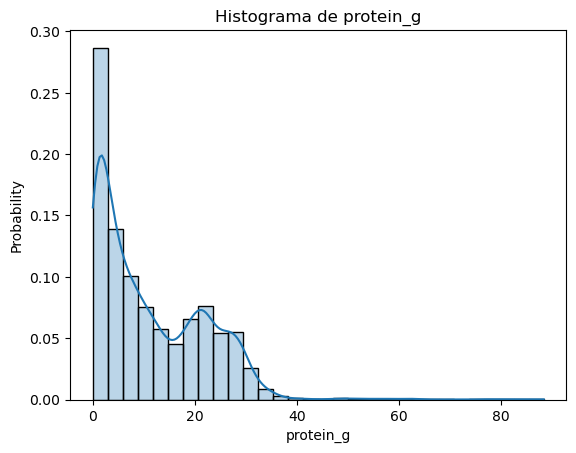

In [26]:
# Histograma con curva de densidad 
sns.histplot(df['protein_g'], 
             kde = True,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability') 
plt.title('Histograma de protein_g')
plt.show()

In [27]:
CalculaMetricas(df['protein_g'])

Medidas de Tendencia Central
Media: 11.0
Media Recortada: 10.0
Mediana: 8.0

Medidas de Localización
Primer Cuartil: 2.0
Tercer Cuartil: 20.0
Percentil 1: 0.0
Percentil 99: 35.0

Medidas de Dispersión Absolutas
Varianza: 111.0
Desvío Estándar: 11.0
Rango Intercuartílico: 18.0
Error Estándar: 0.0

Medidas de Dispersión Relativas
Coeficiente de Variación: 0.93
Desvío Intercuartílico: 0.79

Medidas de Asimetría y Curtosis
Coeficiente de Asimetría: 1.17
Coeficiente de Curtosis: 2.64


Carbohidratos:

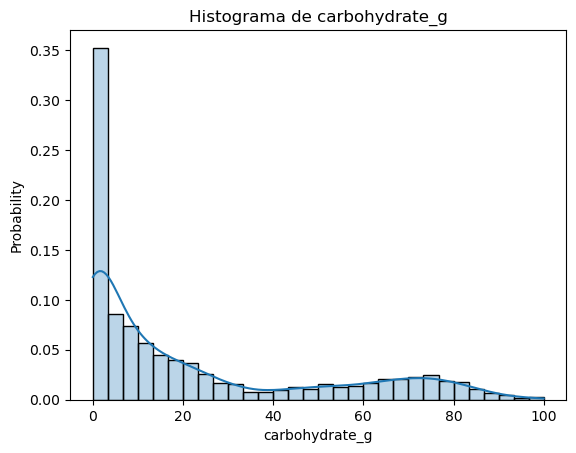

In [28]:
# Histograma con curva de densidad 
sns.histplot(df['carbohydrate_g'], 
             kde = True,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability') 
plt.title('Histograma de carbohydrate_g')
plt.show()

In [29]:
CalculaMetricas(df['carbohydrate_g'])

Medidas de Tendencia Central
Media: 22.0
Media Recortada: 18.0
Mediana: 9.0

Medidas de Localización
Primer Cuartil: 0.0
Tercer Cuartil: 35.0
Percentil 1: 0.0
Percentil 99: 88.0

Medidas de Dispersión Absolutas
Varianza: 743.0
Desvío Estándar: 27.0
Rango Intercuartílico: 35.0
Error Estándar: 0.0

Medidas de Dispersión Relativas
Coeficiente de Variación: 1.23
Desvío Intercuartílico: 1.0

Medidas de Asimetría y Curtosis
Coeficiente de Asimetría: 1.13
Coeficiente de Curtosis: -0.15


Grasas:

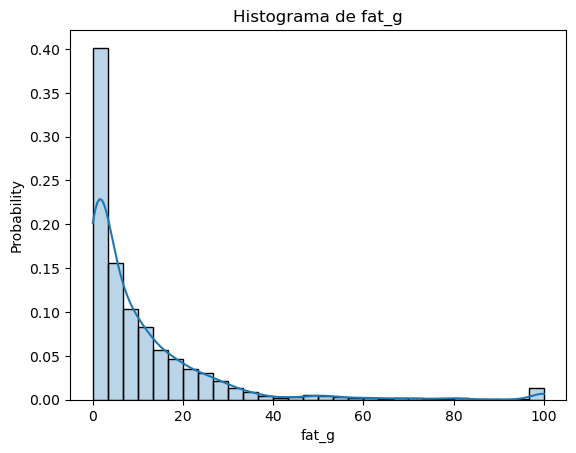

In [30]:
# Histograma con curva de densidad 
sns.histplot(df['fat_g'], 
             kde = True,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability') 
plt.title('Histograma de fat_g')
plt.show()

In [31]:
CalculaMetricas(df['fat_g'])

Medidas de Tendencia Central
Media: 11.0
Media Recortada: 7.0
Mediana: 5.0

Medidas de Localización
Primer Cuartil: 1.0
Tercer Cuartil: 14.0
Percentil 1: 0.0
Percentil 99: 100.0

Medidas de Dispersión Absolutas
Varianza: 250.0
Desvío Estándar: 16.0
Rango Intercuartílico: 13.0
Error Estándar: 0.0

Medidas de Dispersión Relativas
Coeficiente de Variación: 1.5
Desvío Intercuartílico: 0.87

Medidas de Asimetría y Curtosis
Coeficiente de Asimetría: 3.31
Coeficiente de Curtosis: 13.75


Algunas conclusiones:

El promedio(mean) muestra el nivel medio de macronutrientes en el set de datos.
Proteínas: 11.0
Carbohidratos: 22.0
Grasas 11.0:

Pueden existir valores extremos (outliers) que esten 'elevando' mi promedio.

La desviación standard nos da a conocer cuanto se desvía la variable, de su promedio.
Proteínas: 11.0
Carbohidratos: 27.0
Grasas: 16.0

El coeficiente de variación es el cociente entre la desviación standard y el promedio. Muestra la relación entre la media y la variabilidad de la variable.
Proteínas: 0.93
Carbohidratos: 1.23
Grasas: 1.5

Los percentiles en este caso me sirven para entender como se distribuyen estos tres macronutrientes. 

Por ejemplo para proteínas el percentil 99 es 35. Indica que si ordenamos de menor a mayor la variable 'proteing_g', en el 99% de los casos el máximo valor es 35 gramos.

NRF (Nutrient Rich Foods) es un sistema de puntuación para clasificar alimentos según su contenido y calidad de nutrientes.

Se calcula como la suma de los porcentajes de valores diarios recomendados de nutrientes a promover, menos la suma de porcentajes de los valores máximos recomendados de nutrientes a limitar.
Existen distintos modelos de NRF, los cuáles consideran mayor o menor cantidad de nutrientes (por ejemplo NRF9.3, NRF11.3, etc.)

En este análisis, utilizaremos el NRF15.3 (15 nutrientes a promover, 3 nutrientes a limitar)

A promover (15): proteínas, fibra, grasa monoinsaturada, vitaminas (A, C, D, E, tiamina, riboflavina, B12, folato) y minerales (calcio, hierro, zink, potasio).
A limitar (3): azúcares totales (en algunos modelos toman solo azúcar agregada), grasas saturadas y sodio.

Nota: para calcular este índice, se toman en cuenta solamente los nutrientes comentados anteriormente como parámetros. Esto quiere decir que el puntaje que se le asigna a cada alimento, es considerando esos nutrientes y nada más (por ejemplo, NRF15.3 no considera como nutriente a limitar a las grasas trans).


In [32]:
#Conversión vitamina D
#en este set de datos viene expresado en UI(Unidades Internacionales). 
#la FDA considera los valores diarios recomendados en mcg(Microgramos), por lo que hacemos la conversión
#1 IU = 0.025 mcg
df['vitamin_d_mcg'] = df['vitamin_d_IU']*0.025

In [33]:
# para hacer el cálculo del NRF15.3 es necesario obtener los alimentos y sus nutrientes considerados para 100kcal
# en el set de datos los nutrientes que se muestran están expresados segun 100 gramos del alimento, 
# por lo que primero debemos expresar los nutrientes según 100 kcal
# Crear un nuevo DataFrame dfNRF153 con la columna de food_description y una nueva columna de nombre kcal con valores 100
dfNRF153 = pd.DataFrame({'food_description': df['food_description'],'Kcal': 100})
dfNRF153.head(5)

,food_description,Kcal
0,Cornstarch,100
1,"Nuts, pecans",100
2,"Eggplant, raw",100
3,"Teff, uncooked",100
4,"Sherbet, orange",100


In [34]:
#Calculamos la cantidad de alimentos que aporta 100 kcal de energía
dfNRF153['gramos'] = dfNRF153['Kcal']*100/df['calories_100g']
dfNRF153.head(5)

,food_description,Kcal,gramos
0,Cornstarch,100,26.246719
1,"Nuts, pecans",100,14.471780
2,"Eggplant, raw",100,400.000000
3,"Teff, uncooked",100,27.247956
4,"Sherbet, orange",100,69.444444


In [35]:
# calculamos los nutrientes a promover para 100kcal de alimento
dfNRF153['protein_g']=dfNRF153['gramos']*df['protein_g']/100
#probamos
dfNRF153.head(5)
#funciona

,food_description,Kcal,gramos,protein_g
0,Cornstarch,100,26.246719,0.068241
1,"Nuts, pecans",100,14.471780,1.327062
2,"Eggplant, raw",100,400.000000,3.920000
3,"Teff, uncooked",100,27.247956,3.623978
4,"Sherbet, orange",100,69.444444,0.763889


In [36]:
# calculamos el resto de los nutrientes a promover para 100kcal de alimento
dfNRF153['fiber_g']=dfNRF153['gramos']*df['fiber_g']/100
dfNRF153['monounsaturated_fatty_acids_g']=dfNRF153['gramos']*df['monounsaturated_fatty_acids_g']/100
dfNRF153['vitamin_a_rae_mcg']=dfNRF153['gramos']*df['vitamin_a_rae_mcg']/100
dfNRF153['vitamin_c_mg']=dfNRF153['gramos']*df['vitamin_c_mg']/100
dfNRF153['vitamin_d_mcg']=dfNRF153['gramos']*df['vitamin_d_mcg']/100
dfNRF153['vitamin_e_mg']=dfNRF153['gramos']*df['vitamin_e_mg']/100
dfNRF153['thiamin_mg']=dfNRF153['gramos']*df['thiamin_mg']/100
dfNRF153['riboflavin_mg']=dfNRF153['gramos']*df['riboflavin_mg']/100
dfNRF153['vitamin_b12_mcg']=dfNRF153['gramos']*df['vitamin_b12_mcg']/100
dfNRF153['riboflavin_mg']=dfNRF153['gramos']*df['riboflavin_mg']/100
dfNRF153['folate_mcg']=dfNRF153['gramos']*df['folate_mcg']/100
dfNRF153['calcium_mg']=dfNRF153['gramos']*df['calcium_mg']/100
dfNRF153['potassium_mg']=dfNRF153['gramos']*df['potassium_mg']/100
dfNRF153['zink_mg']=dfNRF153['gramos']*df['zink_mg']/100
dfNRF153['irom_mg']=dfNRF153['gramos']*df['irom_mg']/100
dfNRF153.head(5)

,food_description,Kcal,gramos,protein_g,fiber_g,monounsaturated_fatty_acids_g,vitamin_a_rae_mcg,vitamin_c_mg,vitamin_d_mcg,vitamin_e_mg,thiamin_mg,riboflavin_mg,vitamin_b12_mcg,folate_mcg,calcium_mg,potassium_mg,zink_mg
0,Cornstarch,100,26.246719,0.068241,0.236220,0.004199,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.524934,0.787402,0.015748
1,"Nuts, pecans",100,14.471780,1.327062,1.389291,5.904631,0.434153,0.159190,0.0,0.202605,0.095514,0.018813,0.000000,3.183792,10.130246,59.334298,0.655572
2,"Eggplant, raw",100,400.000000,3.920000,12.000000,0.064000,4.000000,8.800000,0.0,1.200000,0.156000,0.148000,0.000000,88.000000,36.000000,916.000000,0.640000
3,"Teff, uncooked",100,27.247956,3.623978,2.179837,0.160490,0.000000,0.000000,0.0,0.021798,0.106267,0.073569,0.000000,0.000000,49.046322,116.348774,0.989101
4,"Sherbet, orange",100,69.444444,0.763889,0.902778,0.368056,8.333333,1.597222,0.0,0.006944,0.018750,0.067361,0.090278,2.777778,37.500000,66.666667,0.333333


In [37]:
# calculamos los nutrientes a limitar para 100kcal de alimento
dfNRF153['saturated_fatty_acids_g']=dfNRF153['gramos']*df['saturated_fatty_acids_g']/100
dfNRF153['sugars_g']=dfNRF153['gramos']*df['sugars_g']/100
dfNRF153['sodium_mg']=dfNRF153['gramos']*df['sodium_mg']/100
dfNRF153.head(5)

,food_description,Kcal,gramos,protein_g,fiber_g,monounsaturated_fatty_acids_g,vitamin_a_rae_mcg,vitamin_c_mg,vitamin_d_mcg,vitamin_e_mg,thiamin_mg,riboflavin_mg,vitamin_b12_mcg,folate_mcg,calcium_mg,potassium_mg,zink_mg,saturated_fatty_acids_g,sugars_g,sodium_mg
0,Cornstarch,100,26.246719,0.068241,0.236220,0.004199,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.524934,0.787402,0.015748,0.002362,0.000000,2.362205
1,"Nuts, pecans",100,14.471780,1.327062,1.389291,5.904631,0.434153,0.159190,0.0,0.202605,0.095514,0.018813,0.000000,3.183792,10.130246,59.334298,0.655572,0.894356,0.574530,0.000000
2,"Eggplant, raw",100,400.000000,3.920000,12.000000,0.064000,4.000000,8.800000,0.0,1.200000,0.156000,0.148000,0.000000,88.000000,36.000000,916.000000,0.640000,0.136000,14.120000,8.000000
3,"Teff, uncooked",100,27.247956,3.623978,2.179837,0.160490,0.000000,0.000000,0.0,0.021798,0.106267,0.073569,0.000000,0.000000,49.046322,116.348774,0.989101,0.122343,0.501362,3.269755
4,"Sherbet, orange",100,69.444444,0.763889,0.902778,0.368056,8.333333,1.597222,0.0,0.006944,0.018750,0.067361,0.090278,2.777778,37.500000,66.666667,0.333333,0.805556,16.888889,31.944444


In [39]:
# finalmente hacemos el calculo, la sumatoria de nutrientes a promover(sobre valores recomendados) SNP
# menos la sumatoria de nutrientes a limitar(sobre valores máximos) SNL 
# NRF153 = SNP - SNL
# valores diarios recomendados y máximos obtenidos de 
# https://www.fda.gov/food/new-nutrition-facts-label/daily-value-new-nutrition-and-supplement-facts-labels

In [40]:
dfNRF153['SNP'] = dfNRF153['protein_g']/50+(dfNRF153['fiber_g']/28)+dfNRF153['monounsaturated_fatty_acids_g']/44+dfNRF153['vitamin_a_rae_mcg']/900 +dfNRF153['vitamin_c_mg']/90 +dfNRF153['vitamin_d_mcg']/20 +dfNRF153['vitamin_e_mg']/15 +dfNRF153['thiamin_mg']/1.2 +dfNRF153['riboflavin_mg']/1.3 +dfNRF153['folate_mcg']/400 +dfNRF153['calcium_mg']/1300 +dfNRF153['irom_mg']/18 +dfNRF153['potassium_mg']/4700 +dfNRF153['zink_mg']/11
dfNRF153.head(5)

,food_description,Kcal,gramos,protein_g,fiber_g,monounsaturated_fatty_acids_g,vitamin_a_rae_mcg,vitamin_c_mg,vitamin_d_mcg,vitamin_e_mg,...,vitamin_b12_mcg,folate_mcg,calcium_mg,potassium_mg,zink_mg,saturated_fatty_acids_g,sugars_g,sodium_mg,irom_mg,SNP
0,Cornstarch,100,26.246719,0.068241,0.236220,0.004199,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.524934,0.787402,0.015748,0.002362,0.000000,2.362205,0.123360,0.018753
1,"Nuts, pecans",100,14.471780,1.327062,1.389291,5.904631,0.434153,0.159190,0.0,0.202605,...,0.000000,3.183792,10.130246,59.334298,0.655572,0.894356,0.574530,0.000000,0.366136,0.428494
2,"Eggplant, raw",100,400.000000,3.920000,12.000000,0.064000,4.000000,8.800000,0.0,1.200000,...,0.000000,88.000000,36.000000,916.000000,0.640000,0.136000,14.120000,8.000000,0.920000,1.486373
3,"Teff, uncooked",100,27.247956,3.623978,2.179837,0.160490,0.000000,0.000000,0.0,0.021798,...,0.000000,0.000000,49.046322,116.348774,0.989101,0.122343,0.501362,3.269755,2.079019,0.568482
4,"Sherbet, orange",100,69.444444,0.763889,0.902778,0.368056,8.333333,1.597222,0.0,0.006944,...,0.090278,2.777778,37.500000,66.666667,0.333333,0.805556,16.888889,31.944444,0.097222,0.236474


In [41]:
dfNRF153['SNL'] = dfNRF153['saturated_fatty_acids_g']/20 + dfNRF153['sugars_g']/125 + dfNRF153['sodium_mg']/2300
dfNRF153.head(5)

,food_description,Kcal,gramos,protein_g,fiber_g,monounsaturated_fatty_acids_g,vitamin_a_rae_mcg,vitamin_c_mg,vitamin_d_mcg,vitamin_e_mg,...,folate_mcg,calcium_mg,potassium_mg,zink_mg,saturated_fatty_acids_g,sugars_g,sodium_mg,irom_mg,SNP,SNL
0,Cornstarch,100,26.246719,0.068241,0.236220,0.004199,0.000000,0.000000,0.0,0.000000,...,0.000000,0.524934,0.787402,0.015748,0.002362,0.000000,2.362205,0.123360,0.018753,0.001145
1,"Nuts, pecans",100,14.471780,1.327062,1.389291,5.904631,0.434153,0.159190,0.0,0.202605,...,3.183792,10.130246,59.334298,0.655572,0.894356,0.574530,0.000000,0.366136,0.428494,0.049314
2,"Eggplant, raw",100,400.000000,3.920000,12.000000,0.064000,4.000000,8.800000,0.0,1.200000,...,88.000000,36.000000,916.000000,0.640000,0.136000,14.120000,8.000000,0.920000,1.486373,0.123238
3,"Teff, uncooked",100,27.247956,3.623978,2.179837,0.160490,0.000000,0.000000,0.0,0.021798,...,0.000000,49.046322,116.348774,0.989101,0.122343,0.501362,3.269755,2.079019,0.568482,0.011550
4,"Sherbet, orange",100,69.444444,0.763889,0.902778,0.368056,8.333333,1.597222,0.0,0.006944,...,2.777778,37.500000,66.666667,0.333333,0.805556,16.888889,31.944444,0.097222,0.236474,0.189278


In [42]:
dfNRF153['NRF153'] = (dfNRF153['SNP']-dfNRF153['SNL'])*100
dfNRF153.head(5)

,food_description,Kcal,gramos,protein_g,fiber_g,monounsaturated_fatty_acids_g,vitamin_a_rae_mcg,vitamin_c_mg,vitamin_d_mcg,vitamin_e_mg,...,calcium_mg,potassium_mg,zink_mg,saturated_fatty_acids_g,sugars_g,sodium_mg,irom_mg,SNP,SNL,NRF153
0,Cornstarch,100,26.246719,0.068241,0.236220,0.004199,0.000000,0.000000,0.0,0.000000,...,0.524934,0.787402,0.015748,0.002362,0.000000,2.362205,0.123360,0.018753,0.001145,1.760784
1,"Nuts, pecans",100,14.471780,1.327062,1.389291,5.904631,0.434153,0.159190,0.0,0.202605,...,10.130246,59.334298,0.655572,0.894356,0.574530,0.000000,0.366136,0.428494,0.049314,37.918023
2,"Eggplant, raw",100,400.000000,3.920000,12.000000,0.064000,4.000000,8.800000,0.0,1.200000,...,36.000000,916.000000,0.640000,0.136000,14.120000,8.000000,0.920000,1.486373,0.123238,136.313494
3,"Teff, uncooked",100,27.247956,3.623978,2.179837,0.160490,0.000000,0.000000,0.0,0.021798,...,49.046322,116.348774,0.989101,0.122343,0.501362,3.269755,2.079019,0.568482,0.011550,55.693199
4,"Sherbet, orange",100,69.444444,0.763889,0.902778,0.368056,8.333333,1.597222,0.0,0.006944,...,37.500000,66.666667,0.333333,0.805556,16.888889,31.944444,0.097222,0.236474,0.189278,4.719660


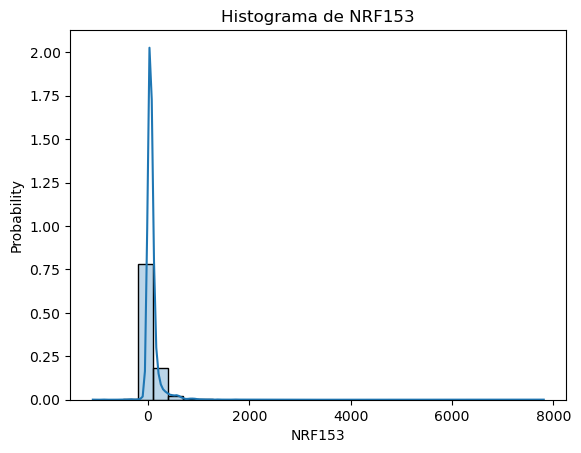

In [43]:
# Histograma con curva de densidad 
sns.histplot(dfNRF153['NRF153'], 
             kde = True,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability') 
plt.title('Histograma de NRF153')
plt.show()

In [44]:
#Voy a topear la variable porque hay outliers
# Calcular percentiles (en este caso, topearemos los valores por encima del percentil 95)
Tope_superior = dfNRF153['NRF153'].quantile(0.95)
Tope_inferior = dfNRF153['NRF153'].quantile(0.05)
dfNRF153['NRF153t']=dfNRF153['NRF153'].clip(lower=Tope_inferior, upper=Tope_superior)

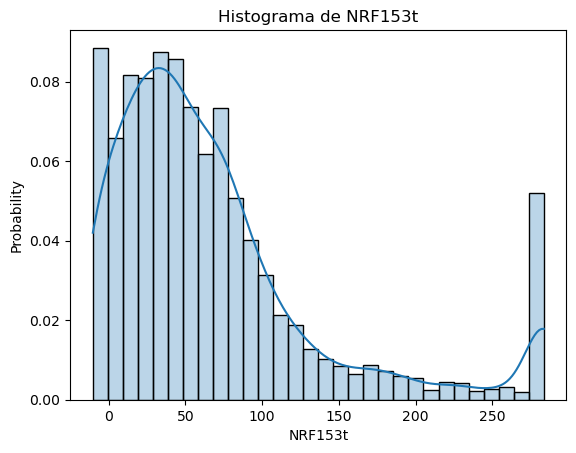

In [45]:
sns.histplot(dfNRF153['NRF153t'], 
             kde = True,
             bins = 30,            
             alpha = 0.3,
             stat = 'probability') 
plt.title('Histograma de NRF153t')
plt.show()

Grupo y subgrupo:

A partir de expresiones regulares y filtros podemos clasificar los alimentos según su origen. La clasificación en este análisis, está basada en la que utiliza la USDA (US Department of Agriculture), que enfatiza la importancia de consumir alimentos de todos los grupos con el objetivo de tener una dieta equilibrada.

Los grupos son: frutas, vegetales, granos, lácteos y alimentos protéicos. A su vez, cada uno se puede dividir en subgrupos para enfatizar aquellos alimentos que son considerados como fuentes de ciertas vitaminas y minerales.

https://www.usda.gov/media/blog/2017/09/26/back-basics-all-about-myplate-food-groups
https://www.myplate.gov/eat-healthy/food-group-gallery

In [46]:
#Defino subgrupos como categoría de alimentos
import spacy

# Cargar el modelo en inglés
nlp = spacy.load('en_core_web_sm')

In [48]:
# Definir palabras clave para cada categoría 
keyword_categories = {
    'Carnes': ['beef','goat','ham','lamb','pork','ham','pork','turkey','game','bear','bison','deer','elk','opossum','moose','rabbit','veal','raccoon','squirrel','venison','brain','chitterlings','giblets','gizzard','heart','kidney','liver','stomach','sweetbreads','tongue','tripe'],
    'Aves de corral': ['chicken','Cornish hen','dove','duck','goose','ostrich','pheasant','quail','turkey','emu'],
    'Huevos': ['^Egg','^Egg ','chicken eggs','duck eggs','eggs'],
    'Pescados/mariscos': ['black sea bass','catfish','cod','flounder','freshwater trout','haddock','hake','halibut','herring','light tuna','mackerel','mullet','perch','salmon','pollock','sea bass','snapper','sole','sushi','tilapia','whiting','Shellfishclams','crab','crayfish','lobster','mussels','octopus','oysters','scallops','shrimp','Canned Fish','squid','anchovies','freshwater trout','herring','light tuna','salmon','sardines','oyster','fish','seafood','tuna','sardine','whale'],
    'Productos de soja': ['tempeh','texturized vegetable protein (TVP)','tofu','TVP','texturized vegetable protein'],
    'Frutos secos': ['almonds','almond butter','Brazil nuts','cashew butter','cashews','chestnuts','chia seeds','flax seeds','hazelnuts (filberts)','macadamia nuts','mixed nuts','peanut butter','peanuts','pine nuts','pecans','pistachios','pumpkin seeds','sesame butter or paste (tahini)','sesame seeds','sunflower butter','sunflower seeds','walnuts','nuts'],
    'Lácteos': ['^Cheese','^Yogurt','^Milk','^Butter','buttermilk','Buttermilk','Ice-cream','ice-cream','ice cream','Ice cream','smoothie','Smoothie','pudding','Pudding','kefir','Kefir'],
    'Frutas': ['^Watermelon','^Bananas','^Apples','^Oranges','^Grapes','^Melons','^Peaches','^Papayas','^Pears','^Kiwi','^Lime','^Tangerines','^Papayas','^Blueberries','^Cherries','^Pineapple','^Passion fruit','^Grapefruit','^Figs','^Cranberries','^Lemon','^Mango','^Pomegranate','^Pumpkin','^Lychee','^Apricots','raw'],
    'Vegetales verdes': ['amaranth leaves','arugula (rocket)','basil','beet greens','bitter melon leaves','bok choy','broccoli','broccoli rabe (rapini)','broccolini','chamnamul','chard','chrysanthemum leaves','cilantro','cress','collard greens','dandelion greens','dark-green leafy lettuce','endive','escarole','kale','lambsquarters','mesclun','mixed greens','mustard greens','nettles','poke greens','romaine lettuce','spinach','Swiss chard','taro leaves','turnip greens','watercress','lettuce'],
    'Vegetales rojos y naranjas': ['acorn squash','butternut squash','calabaza','carrots','hubbard squash','kabocha squash','pimento/pimiento','pumpkin','red and orange bell peppers','red chili peppers','red peppers, sweet','sweet potatoes','tomatoes','winter squash','100% vegetable juice','squash','bell pepper','orange bell pepper','red bell pepper'], 
    'Vegetales almidonados': ['breadfruit','burdock root','cassava','^corn','corn','fufu','green bananas','hominy','jicama','lotus root','parsnips','plantains','potatoes','salsify','taro root (dasheen or yautia)','tapioca','water chestnuts','yams','yucca','sweet potatoes','sweet potato'],
    'Frijoles':['beans','peas','lentils','hummus','chickpeas','chickpea','soybeans'],
    'Otros vegetales': ['alfalfa sprouts','arrowroot','artichokes','asparagus','avocado','bamboo shoots','bean sprouts','beets','bitter melon (bitter gourd, balsam pear)','broccoflower','Brussels sprouts','cabbage','cactus pads (nopales)','cauliflower,','^cauliflower','celeriac','celery','chayote (mirliton)','chives','cucumbers','daikon','drumstick pods (moringa)','eggplant','fennel bulb','fiddlehead ferns','garlic','ginger root','green peppers','green beans','hearts of palm','Jerusalem artichokes (sunchokes)','jute','kohlrabi','leeks','luffa (Chinese okra)','mushrooms','okra','onions','pattypan squash','purslane','radicchio','radishes','red cabbage','rutabaga','seaweed','scallions','sorrel','snow peas','spaghetti squash','tomatillos','turnips','wax beans','yellow squash','zucchini'],
    'Granos enteros': ['amaranth','barley (not pearled)','brown rice','buckwheat','bulgur (cracked wheat)','dark rye','kamut','millet','muesli','oatmeal','oats','popcorn','quinoa','sorghum','rolled oats','spelt','teff','triticale','whole grain barley','whole grain cornmeal','whole grain sorghum','whole rye','whole wheat bread','whole wheat cereal flakes','whole wheat chapati','whole wheat crackers','whole wheat pasta','whole wheat sandwich buns and rolls','whole wheat tortillas','wild rice'],
    'Granos refinados': ['bagels','biscuits','breadcrumbs','cakes','challah bread','cookies','corn flakes','corn tortillas','cornbread','couscous','crackers, saltine','cream of rice','cream of wheat','flour tortilla','English muffins','French bread','grits','masa','matzo','naan','noodles','pancakes','pasta (spaghetti, macaroni)','pie/pastry crusts','pita bread','pizza crust','polenta','pretzels','ramen noodles','refined-grain cereals','refined-grain crackers','rice cakes','rice paper (spring roll wrappers)','rice vermicelli','waffles','white bread','white rice','white sandwich buns and rolls','Bread,','crackers','crackers,'],
    'Aceites/Grasas': ['^Fat','^Oil'],
    'Golosinas y gaseosas': ['dessert','candies','candy','beverage','gum']
}
# Function to assign categories based on keyword matching
def assign_category(description):
    doc = nlp(description.lower())
    for category, keywords_in_category in keyword_categories.items():
        if any(keyword in [token.text for token in doc] for keyword in keywords_in_category):
            return category
    return 'Otro'

# Apply the function to create the new 'Category' column
dfNRF153['Category'] = dfNRF153['food_description'].apply(assign_category)

In [49]:
dfNRF153.head(5)

,food_description,Kcal,gramos,protein_g,fiber_g,monounsaturated_fatty_acids_g,vitamin_a_rae_mcg,vitamin_c_mg,vitamin_d_mcg,vitamin_e_mg,...,zink_mg,saturated_fatty_acids_g,sugars_g,sodium_mg,irom_mg,SNP,SNL,NRF153,NRF153t,Category
0,Cornstarch,100,26.246719,0.068241,0.236220,0.004199,0.000000,0.000000,0.0,0.000000,...,0.015748,0.002362,0.000000,2.362205,0.123360,0.018753,0.001145,1.760784,1.760784,Otro
1,"Nuts, pecans",100,14.471780,1.327062,1.389291,5.904631,0.434153,0.159190,0.0,0.202605,...,0.655572,0.894356,0.574530,0.000000,0.366136,0.428494,0.049314,37.918023,37.918023,Frutos secos
2,"Eggplant, raw",100,400.000000,3.920000,12.000000,0.064000,4.000000,8.800000,0.0,1.200000,...,0.640000,0.136000,14.120000,8.000000,0.920000,1.486373,0.123238,136.313494,136.313494,Frutas
3,"Teff, uncooked",100,27.247956,3.623978,2.179837,0.160490,0.000000,0.000000,0.0,0.021798,...,0.989101,0.122343,0.501362,3.269755,2.079019,0.568482,0.011550,55.693199,55.693199,Granos enteros
4,"Sherbet, orange",100,69.444444,0.763889,0.902778,0.368056,8.333333,1.597222,0.0,0.006944,...,0.333333,0.805556,16.888889,31.944444,0.097222,0.236474,0.189278,4.719660,4.719660,Otro


In [50]:
# Realizar un recuento de los valores únicos en la columna 'Categorias'
recuento_categorias = dfNRF153['Category'].value_counts()

# Mostrar el recuento
print(recuento_categorias)

Category
Otro                          3430
Carnes                        2318
Aves de corral                 501
Granos refinados               419
Frutas                         414
Pescados/mariscos              322
Vegetales almidonados          267
Golosinas y gaseosas           239
Frijoles                       189
Otros vegetales                142
Granos enteros                 139
Frutos secos                   137
Vegetales rojos y naranjas      89
Vegetales verdes                76
Lácteos                         63
Productos de soja               36
Huevos                           8
Name: count, dtype: int64


Conclusiones: Decido eliminar todos los registros con categoría 'Other' por que no ingresan en ninguno de los grupos definidos en la celda anterior.

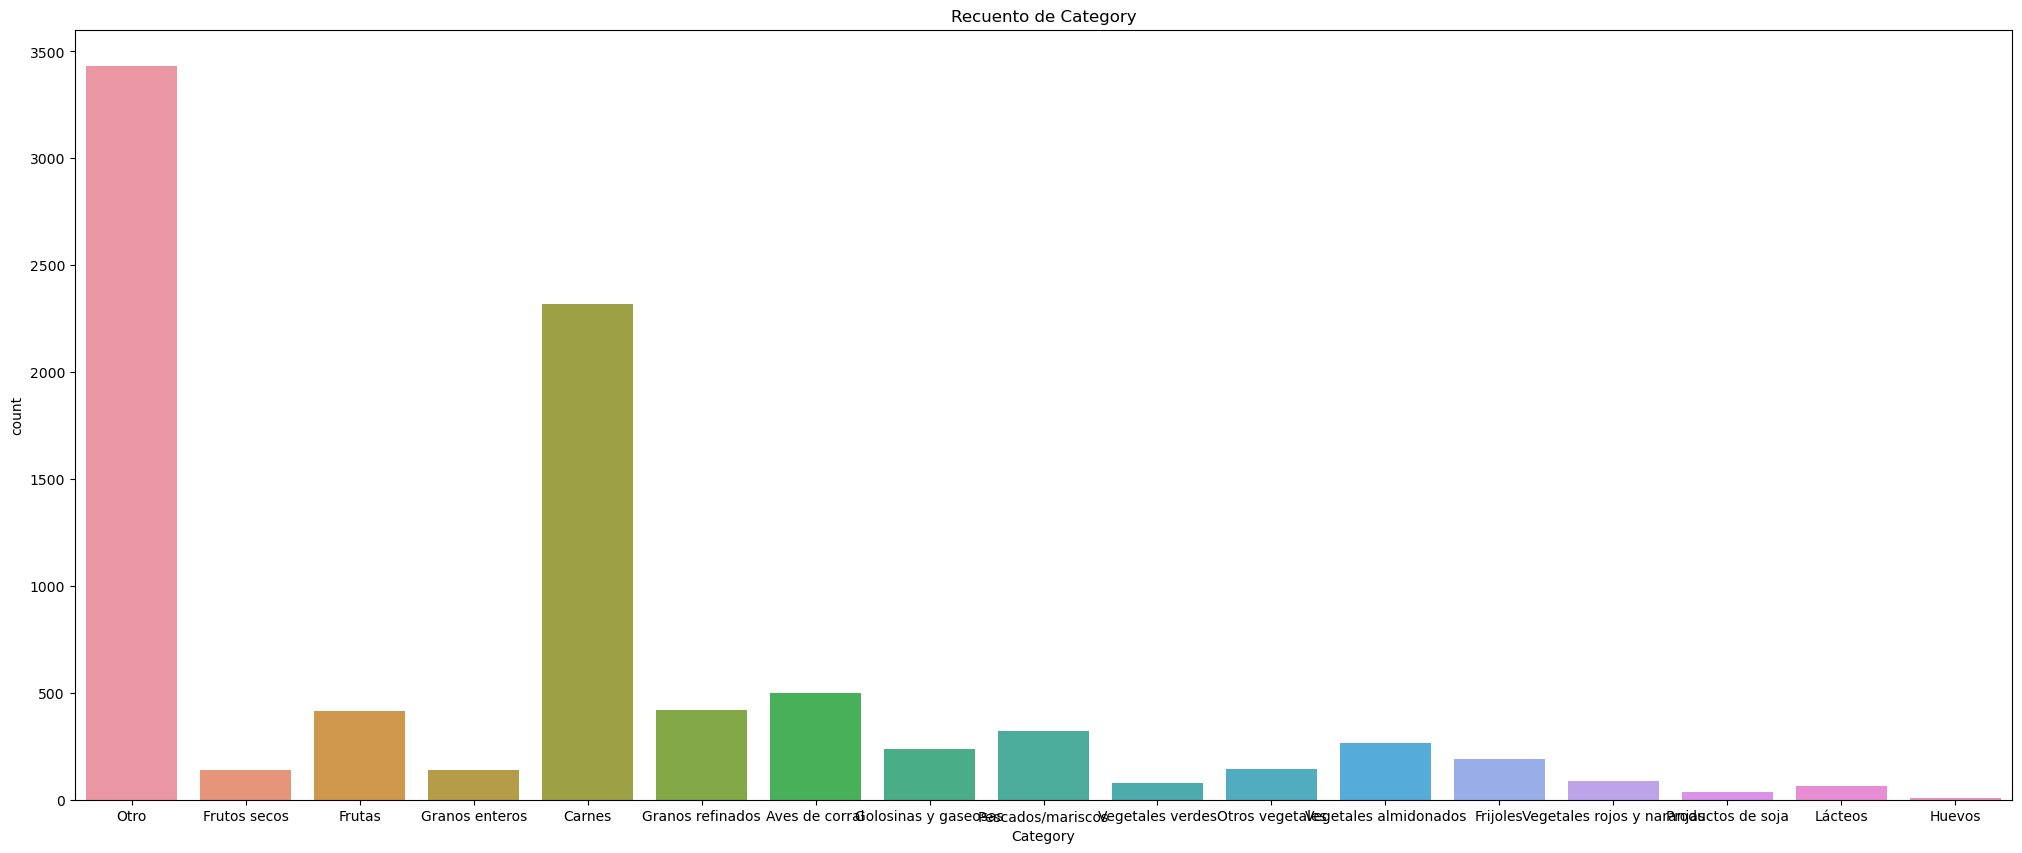

In [53]:
# Creo un gráfico de barras con Seaborn para ver el conto por categoría creada
plt.figure(figsize=(25, 10)) 
sns.countplot(x='Category', data=dfNRF153)

# Agregar título
plt.title('Recuento de Category')

# Mostrar el gráfico
plt.show()

In [54]:
# Calculo el NRF153t medio para cada categoría
dfNRF153_media = dfNRF153.groupby('Category')['NRF153t'].mean().reset_index()

# Renombro la columna 'NRF153t' a 'Media'
dfNRF153_media = dfNRF153_media.rename(columns={'NRF153t': 'Media'})

# Mostrar el DataFrame resultante
print(dfNRF153_media)

                      Category       Media
0               Aves de corral   38.263020
1                       Carnes   67.935171
2                     Frijoles   98.406622
3                       Frutas  162.444133
4                 Frutos secos   40.497941
5         Golosinas y gaseosas    8.427202
6               Granos enteros   62.600739
7             Granos refinados   21.620757
8                       Huevos   68.600732
9                      Lácteos   45.913483
10                        Otro   65.093394
11             Otros vegetales  136.130622
12           Pescados/mariscos   75.579786
13           Productos de soja   67.604474
14       Vegetales almidonados   48.627367
15  Vegetales rojos y naranjas  174.879053
16            Vegetales verdes  172.745018


In [55]:
# Ordenar el DataFrame por la columna 'Media' de mayor a menor
dfNRF153_media = dfNRF153_media.sort_values(by='Media', ascending=False)
print(dfNRF153_media)

                      Category       Media
15  Vegetales rojos y naranjas  174.879053
16            Vegetales verdes  172.745018
3                       Frutas  162.444133
11             Otros vegetales  136.130622
2                     Frijoles   98.406622
12           Pescados/mariscos   75.579786
8                       Huevos   68.600732
1                       Carnes   67.935171
13           Productos de soja   67.604474
10                        Otro   65.093394
6               Granos enteros   62.600739
14       Vegetales almidonados   48.627367
9                      Lácteos   45.913483
4                 Frutos secos   40.497941
0               Aves de corral   38.263020
7             Granos refinados   21.620757
5         Golosinas y gaseosas    8.427202


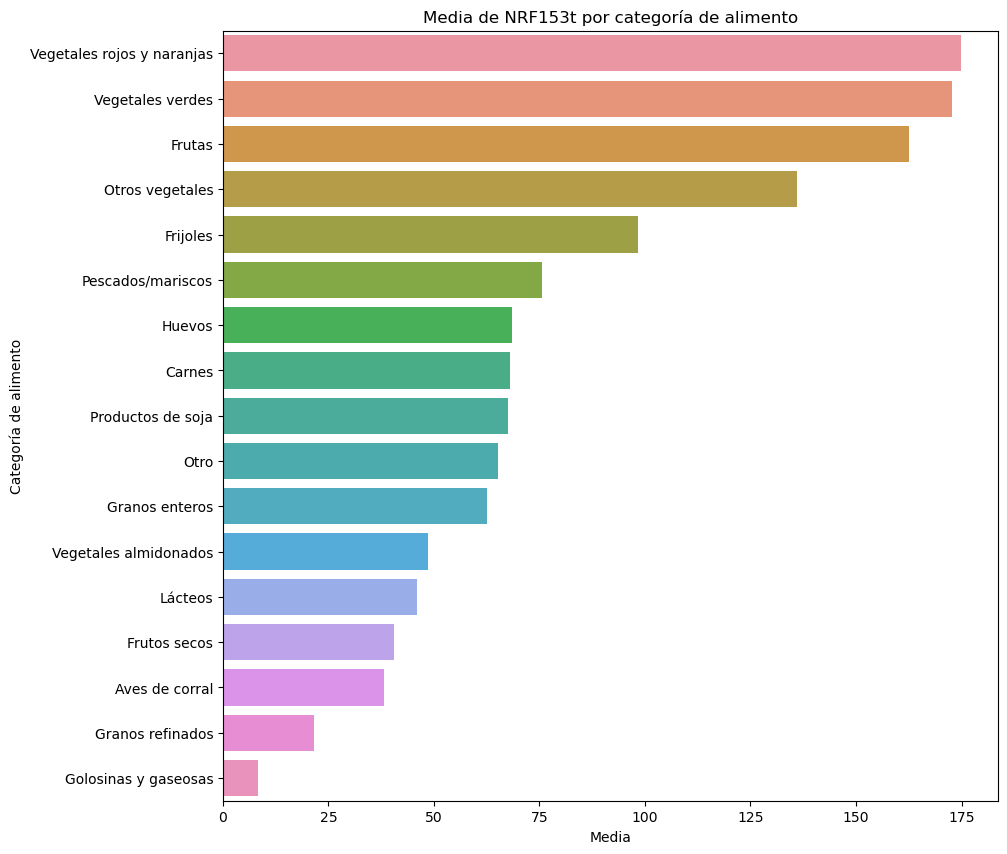

In [56]:
# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(10, 10))
ax=sns.barplot(x='Media', y='Category', data=dfNRF153_media)


# Agregar título y etiquetas
plt.title('Media de NRF153t por categoría de alimento')
plt.xlabel('Media')
plt.ylabel('Categoría de alimento')

# Mostrar el gráfico
plt.show()

In [57]:
#Creo un nuevo data frame df2 con la info original y agrego el NRF153t ,la categoría,
# los aminoácido esenciales y no esenciales y las grasas insaturadas (Campos calculados anteriormente)
df2 = pd.DataFrame({'Alimento(g)': df['food_description'],'Categoria':dfNRF153['Category'],'Calorias(kcal)': df['calories_100g'],'Proteinas(g)': df['protein_g'],'Carbohidratos(g)':df['carbohydrate_g'],'Grasas(g)':df['fat_g'],'NRF15.3':dfNRF153['NRF153'],'AminEsenc(g)':df['AminEsenc'],'AminNoEsenc(g)':df['AminNoEsencc'],'Fibra(g)':df['fiber_g'],'Grasas insaturadas(g)':df['GrasasInsat_g'],'Grasas trans(mg)':df['fatty_acids_total_trans_mg'] })
df2.head(100)


,Alimento(g),Categoria,Calorias(kcal),Proteinas(g),Carbohidratos(g),Grasas(g),NRF15.3,AminEsenc(g),AminNoEsenc(g),Fibra(g),Grasas insaturadas(g),Grasas trans(mg)
0,Cornstarch,Otro,381.0,0.26,91.27,0.05,1.760784,0.122,0.146,0.9,0.041,0.0
1,"Nuts, pecans",Frutos secos,691.0,9.17,13.86,71.97,37.918023,4.422,4.469,9.6,62.415,0.0
2,"Eggplant, raw",Frutas,25.0,0.98,5.88,0.18,136.313494,0.413,0.536,3.0,0.092,0.0
3,"Teff, uncooked",Granos enteros,367.0,13.30,73.13,2.38,55.693199,5.636,6.961,8.0,1.660,0.0
4,"Sherbet, orange",Otro,144.0,1.10,30.40,2.00,4.719660,0.000,0.000,1.3,0.610,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Pears, red anjou, raw",Frutas,62.0,0.33,14.94,0.14,33.858212,0.101,0.168,3.0,0.000,0.0
96,"Horseradish, prepared",Otro,48.0,1.18,11.29,0.69,110.947866,0.000,0.000,3.3,0.469,0.0
97,"Fish, raw, butterfish",Pescados/mariscos,146.0,17.28,0.00,8.02,47.632094,8.866,7.803,0.0,3.970,65.0
98,"Lebanon bologna, beef",Carnes,172.0,19.03,0.44,10.44,34.789691,0.000,0.000,0.0,4.694,55.0


In [ ]:
#Me faltó asignar un nuevo grupo

In [60]:
# Agrupos las categorias en grupos de alimentos más abarcativos
keyword_grupos = {
    'Frutas': ['Frutas'],
    'Granos': ['Granos enteros','Granos refinados'],
    'Lacteos': ['Lacteos'],
    'Proteicos': ['Carnes','Huevos','Aves de corral','Pescados/mariscos','Productos de Soja','Frutos secos'],
    'Vegetales': ['Vegetales verdes','Vegetales rojos y naranjas','Vegetales almidonados','Frijoles','Otros vegetales'],
    'Aceites/grasas': ['Aceites/grasas']
}
# Function to assign categories based on keyword matching
def assign_category(description):
    doc = nlp(description.lower())
    for category, keywords_in_category in keyword_categories.items():
        if any(keyword in [token.text for token in doc] for keyword in keywords_in_category):
            return category
    return 'Other'

# Apply the function to create the new 'Category' column
df2['Grupo'] = df2['Categoria'].apply(assign_category)

In [62]:
df2.head(20)

,Alimento(g),Categoria,Calorias(kcal),Proteinas(g),Carbohidratos(g),Grasas(g),NRF15.3,AminEsenc(g),AminNoEsenc(g),Fibra(g),Grasas insaturadas(g),Grasas trans(mg),Grupo
0,Cornstarch,Otro,381.0,0.26,91.27,0.05,1.760784,0.122,0.146,0.9,0.041,0.0,Other
1,"Nuts, pecans",Frutos secos,691.0,9.17,13.86,71.97,37.918023,4.422,4.469,9.6,62.415,0.0,Other
2,"Eggplant, raw",Frutas,25.0,0.98,5.88,0.18,136.313494,0.413,0.536,3.0,0.092,0.0,Other
3,"Teff, uncooked",Granos enteros,367.0,13.30,73.13,2.38,55.693199,5.636,6.961,8.0,1.660,0.0,Other
4,"Sherbet, orange",Otro,144.0,1.10,30.40,2.00,4.719660,0.000,0.000,1.3,0.610,1.0,Other
5,"Cauliflower, raw",Frutas,25.0,1.92,4.97,0.28,390.162443,0.877,0.814,2.0,0.065,0.0,Other
6,"Taro leaves, raw",Frutas,42.0,4.98,6.70,0.74,572.091197,1.927,0.292,3.7,0.367,0.0,Other
7,"Lamb, raw, ground",Carnes,282.0,16.56,0.00,23.41,27.798615,8.434,7.244,0.0,11.450,73.0,Other
8,"Cheese, camembert",Otro,300.0,19.80,0.46,24.26,28.461272,9.736,11.582,0.0,7.747,72.0,Other
9,Vegetarian fillets,Otro,290.0,23.00,9.00,18.00,101.672859,0.000,0.000,6.1,13.708,0.0,Other
